Epoch 1/15
1391/1391 [==============================] - 56s 39ms/step - loss: 6.6378 - accuracy: 0.0537 - val_loss: 6.4133 - val_accuracy: 0.0670
Epoch 2/15
1391/1391 [==============================] - 57s 41ms/step - loss: 6.0747 - accuracy: 0.0831 - val_loss: 6.0025 - val_accuracy: 0.1077
Epoch 3/15
1391/1391 [==============================] - 56s 41ms/step - loss: 5.6413 - accuracy: 0.1186 - val_loss: 5.8400 - val_accuracy: 0.1250
Epoch 4/15
1391/1391 [==============================] - 55s 39ms/step - loss: 5.3390 - accuracy: 0.1376 - val_loss: 5.7728 - val_accuracy: 0.1330
Epoch 5/15
1391/1391 [==============================] - 55s 40ms/step - loss: 5.0897 - accuracy: 0.1513 - val_loss: 5.7790 - val_accuracy: 0.1372
Epoch 6/15
1391/1391 [==============================] - 54s 39ms/step - loss: 4.8599 - accuracy: 0.1650 - val_loss: 5.8041 - val_accuracy: 0.1379
Epoch 7/15
1391/1391 [==============================] - 53s 38ms/step - loss: 4.6411 - accuracy: 0.1786 - val_loss: 5.8540 -

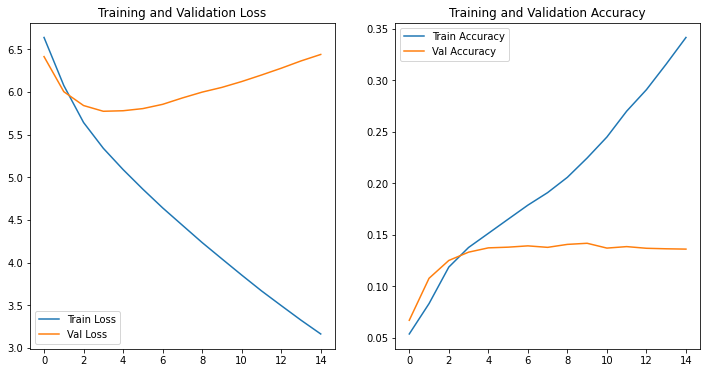

1/1 [==============================] - 0s 380ms/step
Predicted next word after 'the quick brown fox': computers


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load
# Read the text data
with open("1661-0.txt", "r") as f:
    text = f.read().lower()

# 2. Tokenize the text and create sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Fit the tokenizer on the entire text
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 to account for the padding token

# Convert the text into sequences of integers
sequences = tokenizer.texts_to_sequences([text])[0]

# Create input-output pairs (X, y)
sequence_length = 5  # Length of the sequence to predict the next word

X, y = [], []
for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])
    y.append(sequences[i])

X = np.array(X) 
y = np.array(y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=sequence_length))
model.add(LSTM(128, return_sequences=False))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(vocab_size, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 5. Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 7. Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# 8. Predict the next word
def predict_next_word(model, tokenizer, text, sequence_length):
    # Tokenize the input text
    sequence = tokenizer.texts_to_sequences([text])[0]
    
    # If the sequence is shorter than the required length, pad it
    if len(sequence) < sequence_length:
        sequence = [0] * (sequence_length - len(sequence)) + sequence
    
    # Predict the next word
    predicted = model.predict(np.array([sequence]))  # Predict the next word
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    # Convert the predicted index back to word
    predicted_word = tokenizer.index_word[predicted_word_index]
    
    return predicted_word

# Example of predicting the next word
input_text = "the quick brown fox"  # Example input sequence
predicted_word = predict_next_word(model, tokenizer, input_text, sequence_length)
print(f"Predicted next word after '{input_text}': {predicted_word}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load the dataset
# Read the text data (make sure the path is correct)
with open("1661-0.txt", "r") as f:
    text = f.read().lower()

# 2. Tokenize the text and create sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Fit the tokenizer on the entire text
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 to account for the padding token

# Convert the text into sequences of integers
sequences = tokenizer.texts_to_sequences([text])[0]

# Create input-output pairs (X, y)
sequence_length = 5  # Length of the sequence to predict the next word

X, y = [], []
for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])
    y.append(sequences[i])

X = np.array(X)
y = np.array(y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=sequence_length))
model.add(LSTM(128, return_sequences=False))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(vocab_size, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 5. Train the model for 25 epochs (increase from 15)
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 7. Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# 8. Predict the next word
def predict_next_word(model, tokenizer, text, sequence_length):
    # Tokenize the input text
    sequence = tokenizer.texts_to_sequences([text])[0]
    
    # If the sequence is shorter than the required length, pad it
    if len(sequence) < sequence_length:
        sequence = [0] * (sequence_length - len(sequence)) + sequence
    
    # Predict the next word
    predicted = model.predict(np.array([sequence]))  # Predict the next word
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    # Convert the predicted index back to word
    predicted_word = tokenizer.index_word[predicted_word_index]
    
    return predicted_word

# Example of predicting the next word
input_text = "the quick brown fox"  # Example input sequence
predicted_word = predict_next_word(model, tokenizer, input_text, sequence_length)
print(f"Predicted next word after '{input_text}': {predicted_word}")


Epoch 1/25
1391/1391 [==============================] - 55s 38ms/step - loss: 6.6336 - accuracy: 0.0541 - val_loss: 6.3832 - val_accuracy: 0.0712
Epoch 2/25
1391/1391 [==============================] - 56s 40ms/step - loss: 6.0526 - accuracy: 0.0852 - val_loss: 5.9798 - val_accuracy: 0.1107
Epoch 3/25
1391/1391 [==============================] - 53s 38ms/step - loss: 5.6273 - accuracy: 0.1197 - val_loss: 5.8313 - val_accuracy: 0.1272
Epoch 4/25
1391/1391 [==============================] - 53s 38ms/step - loss: 5.3328 - accuracy: 0.1394 - val_loss: 5.7724 - val_accuracy: 0.1329
Epoch 5/25
1391/1391 [==============================] - 52s 38ms/step - loss: 5.0859 - accuracy: 0.1521 - val_loss: 5.7688 - val_accuracy: 0.1368
Epoch 6/25
1391/1391 [==============================] - 54s 39ms/step - loss: 4.8564 - accuracy: 0.1653 - val_loss: 5.8016 - val_accuracy: 0.1382
Epoch 7/25
 399/1391 [=======>......................] - ETA: 33s - loss: 4.5716 - accuracy: 0.1815